Importing Libraries and Data

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [112]:
data=pd.read_csv('/home/ishaq/luminar/RTA Dataset.csv')
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [113]:
data.shape

(12316, 32)

In [114]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


checking datatype of columns

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Exploratory Data Analysis [EDA]

In [116]:
data.duplicated().sum()   #finding duplicate values

0

In [117]:
data['Accident_severity'].value_counts()   #distribution of accident severity

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Text(0.5, 1.0, 'Distribution of accident severity')

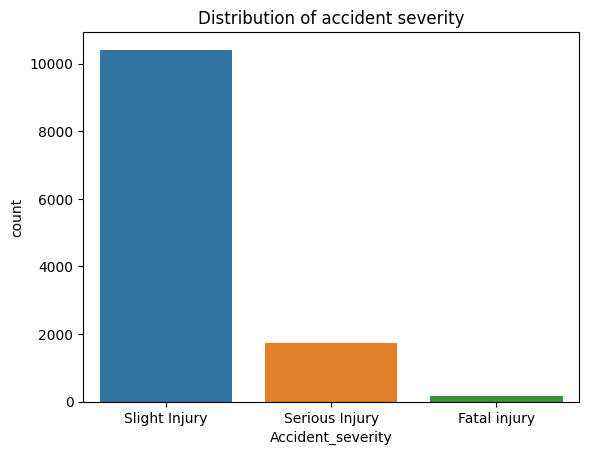

In [118]:
sns.countplot(x=data['Accident_severity'])
plt.title('Distribution of accident severity')

Handling missing values

In [119]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [120]:
#dropping columns which has more than 2500 missing values and Time column
data.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [121]:
#filtering categorical data into a new variable
cat_data=[i for i in data.columns if data[i].dtype=='O']
cat_data

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [122]:
#replacing missing/null values of categorical data with mode of it
for i in cat_data:
  data[i].fillna(data[i].mode()[0],inplace=True)
data.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Data Visualization

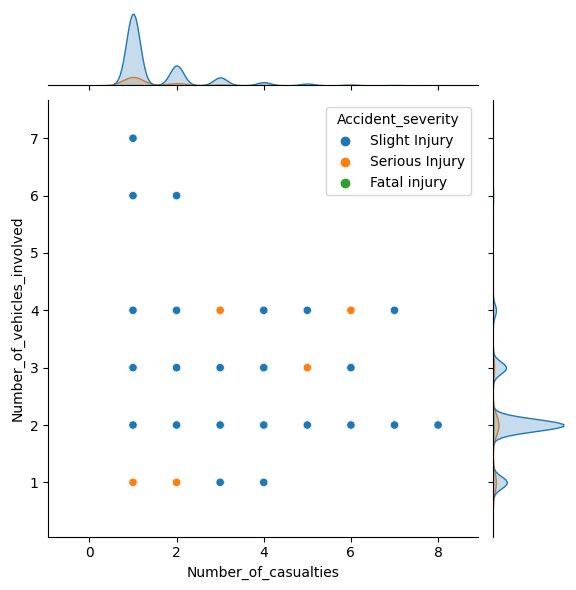

In [123]:
#relation between no. of casualties and no. of vehicles involved
sns.jointplot(x=data['Number_of_casualties'],y=data['Number_of_vehicles_involved'],hue=data['Accident_severity'])

Correlation between numerical columns

In [124]:
data.corr()

/tmp/ipykernel_6864/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


/tmp/ipykernel_6864/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

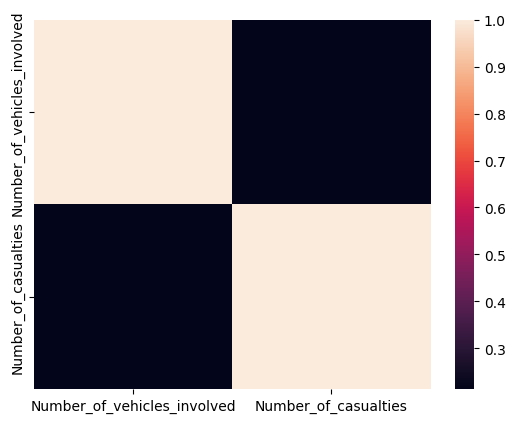

In [125]:
sns.heatmap(data.corr())

In [126]:
#filtering numerical columns into a new variable
numerical=[i for i in data.columns if data[i].dtype!='O']
numerical

['Number_of_vehicles_involved', 'Number_of_casualties']

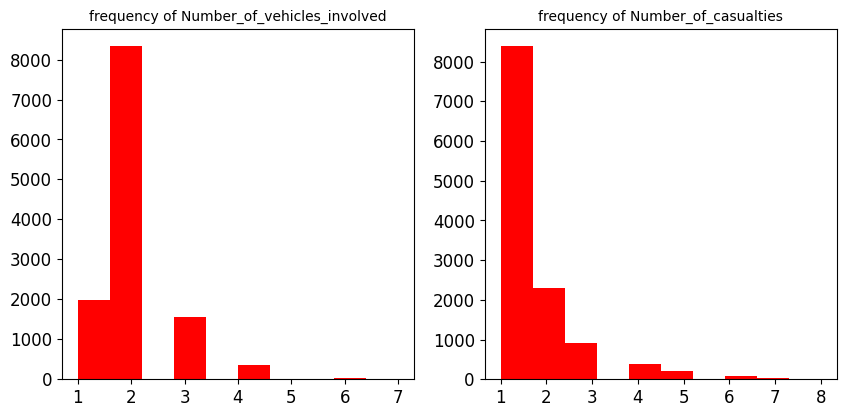

In [127]:
#distribution of numerical columns
plt.figure(figsize=(10,10))
plotnumber=1
for i in numerical:
  if plotnumber<=data.shape[1]:
    dis=plt.subplot(2,2,plotnumber)
    plt.hist(data[i],color='red')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('frequency of '+i, fontsize=10)
  plotnumber +=1

Observation:
Most accidents are occured when 2 vehicles are involved and 1 casuality is happend mostly in the accidents.

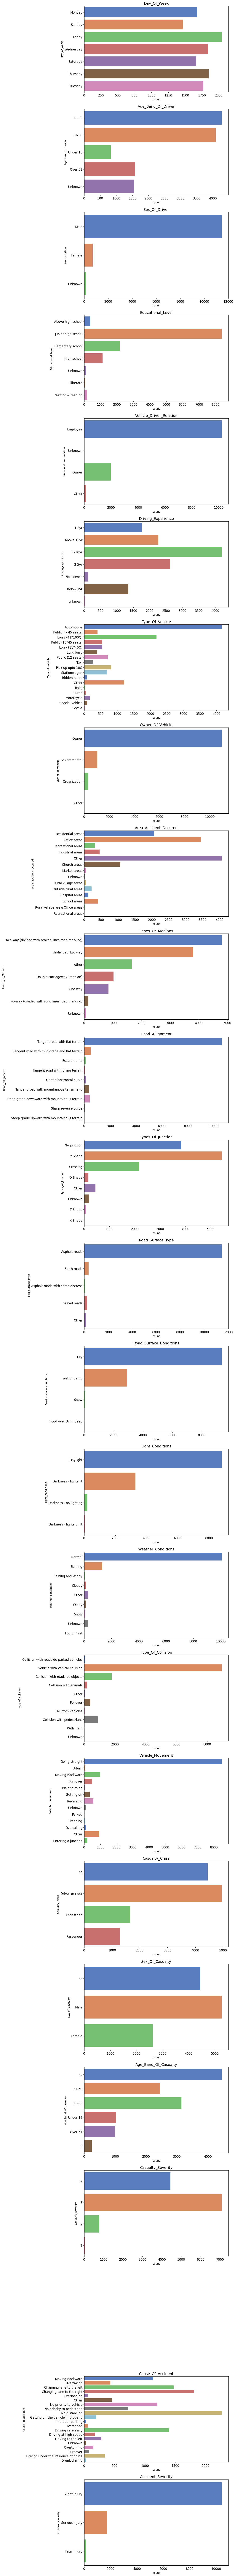

In [128]:
#visualize categorical values
plt.figure(figsize=(10,200))
plotnumber=1

for col in cat_data:
  if plotnumber<=data.shape[1] and col!='Pedestrian_movement':
    ct=plt.subplot(28,1,plotnumber)
    sns.countplot(data=data, y=col, palette='muted')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.ylabel=('')
  plotnumber +=1


Handling Categorial values

In [129]:
data.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

encoding categorical columns

In [130]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.DataFrame()
#adding all the categorical column expcet the output to new data frame
for i in cat_data:
    if i!='Accident_severity':
        df[i]=le.fit_transform(data[i])

In [131]:
df.dtypes

Day_of_week                int64
Age_band_of_driver         int64
Sex_of_driver              int64
Educational_level          int64
Vehicle_driver_relation    int64
Driving_experience         int64
Type_of_vehicle            int64
Owner_of_vehicle           int64
Area_accident_occured      int64
Lanes_or_Medians           int64
Road_allignment            int64
Types_of_Junction          int64
Road_surface_type          int64
Road_surface_conditions    int64
Light_conditions           int64
Weather_conditions         int64
Type_of_collision          int64
Vehicle_movement           int64
Casualty_class             int64
Sex_of_casualty            int64
Age_band_of_casualty       int64
Casualty_severity          int64
Pedestrian_movement        int64
Cause_of_accident          int64
dtype: object

In [132]:
#encoded data
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,...,3,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,...,0,2,8,2,3,2,5,3,5,16


Feature selection

In [133]:
from sklearn.feature_selection import chi2
values=chi2(df,data['Accident_severity'])
values

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
         4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
         0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
         1.14934538, 10.09632283,  2.20071197,  3.2168602 ,  0.12594479,
        13.77841337,  0.20273788,  0.39747982,  3.19366551]),
 array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
        6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
        1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
        3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
        6.42112839e-03, 3.32752607e-01, 2.00201664e-01, 9.38969394e-01,
        1.01872169e-03, 9.03599597e-01, 8.19763078e-01, 2.02536988e-01]))

In [134]:
DF_values=pd.DataFrame({'features':df.columns,'F_values':values[0],'P_values':values[1]})
DF_values.sort_values(by='P_values')

,features,F_values,P_values
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


we need higher Fscore and lower the Pvalues, so by evaluating, we can remove :Owner_of_vehicle, Type_of_vehicle, Road_surface_conditions, Pedestrian_movement,Casualty_severity,Educational_level,Day_of_week,Sex_of_driver,Road_allignment, Sex_of_casualty

In [135]:
df1=data.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df1.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Area_accident_occured        12316 non-null  object
 4   Lanes_or_Medians             12316 non-null  object
 5   Types_of_Junction            12316 non-null  object
 6   Road_surface_type            12316 non-null  object
 7   Light_conditions             12316 non-null  object
 8   Weather_conditions           12316 non-null  object
 9   Type_of_collision            12316 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Vehicle_movement             12316 non-null  object
 13  Casualty_class               12

In [137]:
# sort caregorical values from new dataframe
categorical_new=[i for i in df1.columns if df1[i].dtype=='O']
categorical_new

['Age_band_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Types_of_Junction',
 'Road_surface_type',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Age_band_of_casualty',
 'Cause_of_accident',
 'Accident_severity']

In [138]:
for i in categorical_new:
    print(df1[i].value_counts())

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: Vehicle_driver_relation, dtype: int64
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured,

Ecoding categorical new data

In [139]:
dummy=pd.get_dummies(df1[['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Area_accident_occured',
                          'Lanes_or_Medians','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions',
                          'Type_of_collision','Vehicle_movement','Casualty_class','Age_band_of_casualty','Cause_of_accident']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [140]:
df2=pd.concat([df1,dummy],axis=1)
df2.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,0,0,0,0,0,0,0,0,0,0
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,0,0,0,0,0,0,0,0,0,0
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,0
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0


In [142]:
#dropping dummied columns
df2.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)
df2.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,Serious Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


seprating input and output columns

In [144]:
x=df2.drop(['Accident_severity'],axis=1)
y=df2['Accident_severity']

In [145]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


<Axes: xlabel='Accident_severity', ylabel='count'>

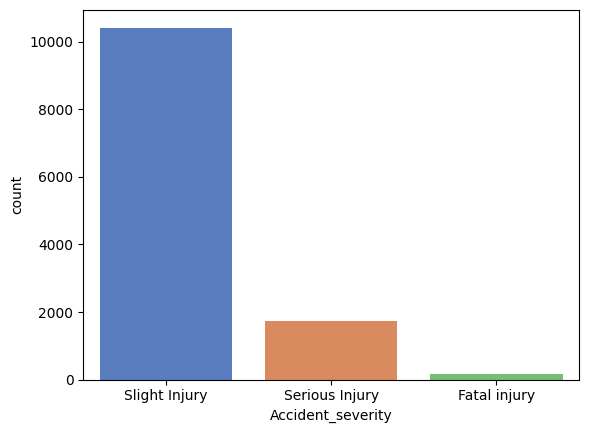

In [147]:
sns.countplot(x=y,palette='muted')


Over sampling

In [148]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
xo,yo=oversampling.fit_resample(x,y)

<Axes: xlabel='Accident_severity', ylabel='count'>

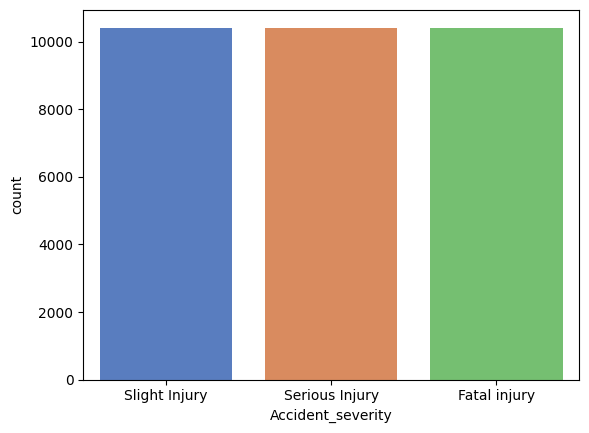

In [149]:
sns.countplot(x=yo,palette='muted')

splitting of training and testing data

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(21871, 104) (21871,) (9374, 104) (9374,)


Model creation

In [151]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
y_knn

array(['Serious Injury', 'Serious Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

[[3124    1    1]
 [ 241 2862   41]
 [ 536 1596  972]] 

0.7422658416897803 

                precision    recall  f1-score   support

  Fatal injury       0.80      1.00      0.89      3126
Serious Injury       0.64      0.91      0.75      3144
 Slight Injury       0.96      0.31      0.47      3104

      accuracy                           0.74      9374
     macro avg       0.80      0.74      0.70      9374
  weighted avg       0.80      0.74      0.71      9374



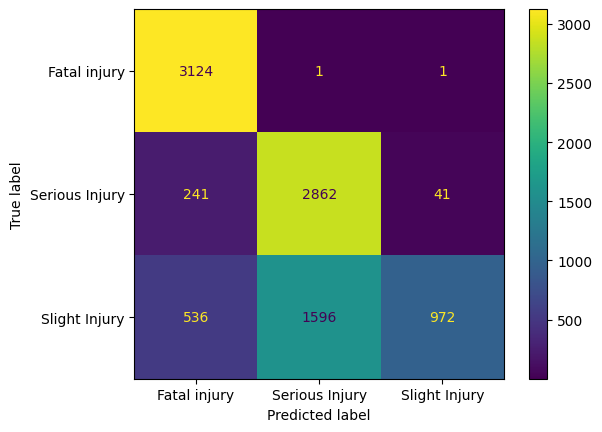

In [153]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix,ConfusionMatrixDisplay
matrix_knn=confusion_matrix(y_test,y_knn)
print(matrix_knn,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_knn))
accuracy_knn=accuracy_score(y_test,y_knn)
print(accuracy_knn,'\n')
report_knn=classification_report(y_test,y_knn)
print(report_knn)


In [154]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_nb=nb.predict(x_test)
y_nb

array(['Fatal injury', 'Serious Injury', 'Serious Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype='<U14')

[[2342  648  136]
 [ 714 1629  801]
 [ 207  804 2093]] 

0.6468956688713463 

                precision    recall  f1-score   support

  Fatal injury       0.72      0.75      0.73      3126
Serious Injury       0.53      0.52      0.52      3144
 Slight Injury       0.69      0.67      0.68      3104

      accuracy                           0.65      9374
     macro avg       0.65      0.65      0.65      9374
  weighted avg       0.65      0.65      0.65      9374



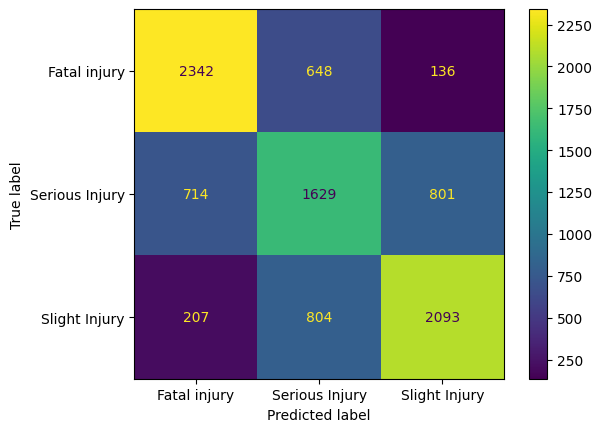

In [155]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix,ConfusionMatrixDisplay
matrix_nb=confusion_matrix(y_test,y_nb)
print(matrix_nb,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_nb))
accuracy_nb=accuracy_score(y_test,y_nb)
print(accuracy_nb,'\n')
report_nb=classification_report(y_test,y_nb)
print(report_nb)

In [156]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_svm=svm.predict(x_test)
y_svm

array(['Serious Injury', 'Slight Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

[[3001   87   38]
 [ 246 2320  578]
 [  16  254 2834]] 

0.8699594623426499 

                precision    recall  f1-score   support

  Fatal injury       0.92      0.96      0.94      3126
Serious Injury       0.87      0.74      0.80      3144
 Slight Injury       0.82      0.91      0.86      3104

      accuracy                           0.87      9374
     macro avg       0.87      0.87      0.87      9374
  weighted avg       0.87      0.87      0.87      9374



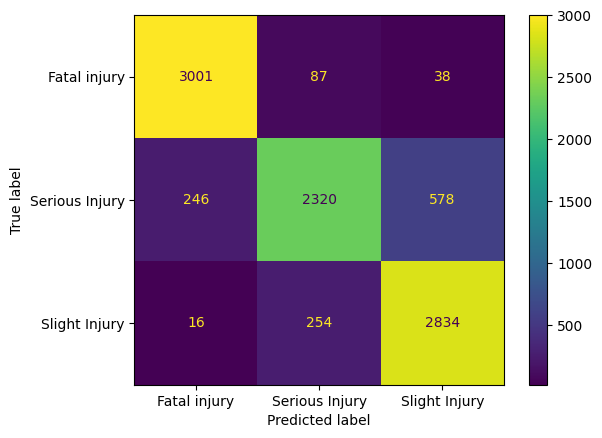

In [157]:
matrix_svm=confusion_matrix(y_test,y_svm)
print(matrix_svm,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_svm))
accuracy_svm=accuracy_score(y_test,y_svm)
print(accuracy_svm,'\n')
report_svm=classification_report(y_test,y_svm)
print(report_svm)


In [159]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)
y_dt

array(['Serious Injury', 'Slight Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

[[3097    9   20]
 [  45 2679  420]
 [  85  819 2200]] 

0.8508640921698315 

                precision    recall  f1-score   support

  Fatal injury       0.96      0.99      0.97      3126
Serious Injury       0.76      0.85      0.81      3144
 Slight Injury       0.83      0.71      0.77      3104

      accuracy                           0.85      9374
     macro avg       0.85      0.85      0.85      9374
  weighted avg       0.85      0.85      0.85      9374



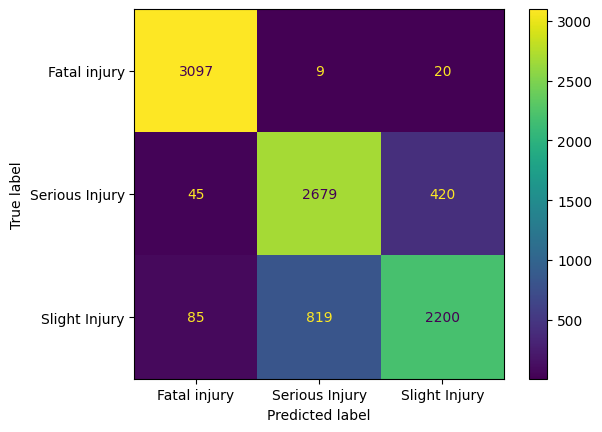

In [160]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix,ConfusionMatrixDisplay
matrix_dt=confusion_matrix(y_test,y_dt)
print(matrix_dt,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dt))
accuracy_dt=accuracy_score(y_test,y_dt)
print(accuracy_dt,'\n')
report_dt=classification_report(y_test,y_dt)
print(report_dt)

In [161]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=25,criterion='entropy')
rf.fit(x_train,y_train)
y_rf=rf.predict(x_test)
y_rf

array(['Serious Injury', 'Slight Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'], dtype=object)

[[3106    2   18]
 [  17 2814  313]
 [  17  507 2580]] 

0.9067633880947301 

                precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      3126
Serious Injury       0.85      0.90      0.87      3144
 Slight Injury       0.89      0.83      0.86      3104

      accuracy                           0.91      9374
     macro avg       0.91      0.91      0.91      9374
  weighted avg       0.91      0.91      0.91      9374



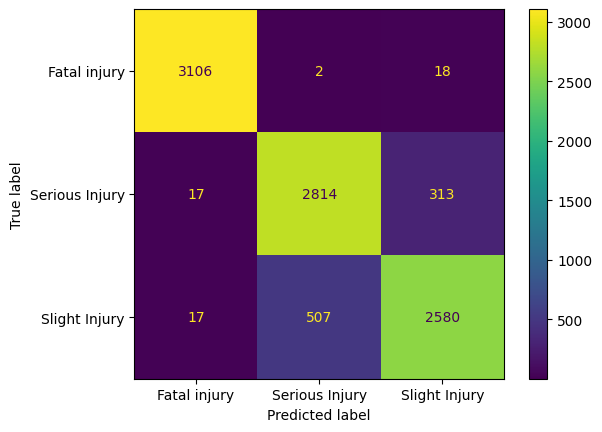

In [162]:
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix,ConfusionMatrixDisplay
matrix_rf=confusion_matrix(y_test,y_rf)
print(matrix_rf,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf))
accuracy_rf=accuracy_score(y_test,y_rf)
print(accuracy_rf,'\n')
report_rf=classification_report(y_test,y_rf)
print(report_rf)

Comparing accuracy of models

In [165]:
mod=['KNN','Naive Bayes','SVM','Decision Tree','Random Forest']
acc=[accuracy_knn,accuracy_nb,accuracy_svm,accuracy_dt,accuracy_rf]
Accuracy_Scores=pd.DataFrame({'Algorithms':mod, 'Accuracy': acc})
Accuracy_Scores['Accuracy']=Accuracy_Scores['Accuracy']*100
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
4,Random Forest,90.676339
2,SVM,86.995946
3,Decision Tree,85.086409
0,KNN,74.226584
1,Naive Bayes,64.689567


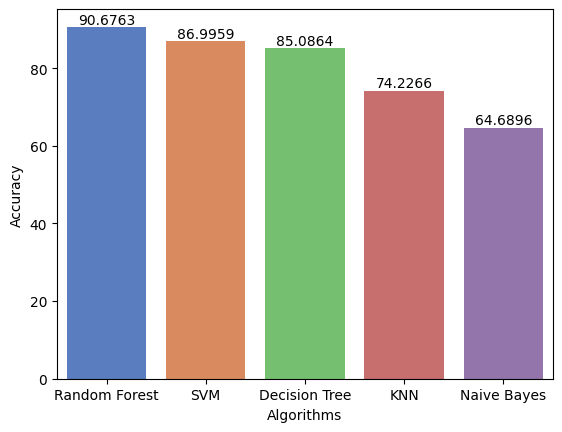

In [166]:
acc_pt=sns.barplot(x='Algorithms',y='Accuracy',palette='muted',data=Accuracy_Scores.sort_values(by='Accuracy',ascending=False),errwidth=0)
for i in acc_pt.containers:
    acc_pt.bar_label(i,)